In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(centers=3, random_state=42)

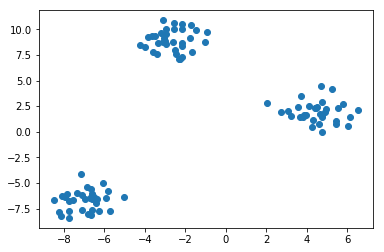

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [10]:
class Cluster:
    
    def __init__(self, center, label):
        
        self.center = center
        self.label = label
        self.points = []
    
    
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [18]:
class KMeansCustom:
    
    def __init__(self, n_clusters=3, max_iters=20, n_init=10):
        
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        
    def fit(self, X):
        
        clusters = []
        
        for i in range(self.n_clusters):
            cluster = Cluster(random.choice(X), i)
            clusters.append(cluster)
            
        for i in range(self.max_iters):
            labels = []
            
            for point in X:
                distances = []
                
                for cluster in clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))

                index = np.array(distances)[:, 0].argmin()
                
                selected_dis, selected_cluster = distances[index]
                
                selected_cluster.points.append(point)
                labels.append(selected_cluster.label)
            
            for cluster in clusters:
                cluster.relocate()
                
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
            
            
        

In [19]:
random.choice(X)

array([-2.14780202, 10.55232269])

In [24]:
model = KMeansCustom(3)

In [25]:
model.fit(X)

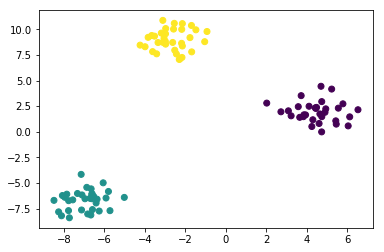

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)